# Data Workflow Lab 2

Proceed with your analysis of the Project 3 data set. You may need to compute new columns as you proceed. Fit one or more linear models to the data, investigate model fits and outliers, use regularization when appropriate.

### Learning objectives
- Perform exploratory analysis
- Generate correlation matrix of the features
- Generate linear regression models
- Evaluate model fit

If appropriate for your models and featuers:
- Use `fit_transform` or [feature selection](http://scikit-learn.org/stable/modules/feature_selection.html) to pick the best features
- Try different regularization options

In [2]:
% matplotlib inline

from collections import defaultdict
import datetime

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn import linear_model

In [3]:
# Load the data from the previous lab
# If you changed the name you'll need to edit the next line
sales = pd.read_csv("data/sales.csv")
sales.dropna(inplace=True)
del sales["Unnamed: 0"]
# Convert dates
sales["First Date"] = pd.to_datetime(sales["First Date"], format="%Y-%m-%d")
sales["Last Date"] = pd.to_datetime(sales["Last Date"], format="%Y-%m-%d")

sales.head()

,Store Number,City,2015 Sales,2015 Sales mean,County Number,Price per Liter mean,Zip Code,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2016 Sales Q1,First Date,Last Date
0,2106,CEDAR FALLS,1434021.94,281.070549,7,18.846731,50613,93982.72,18.420760,93.802281,337166.53,337804.05,2015-01-08,2016-03-31
1,2113,GOWRIE,85763.42,63.015004,94,17.625704,50543,6500.83,4.776510,21.082425,22351.86,21736.63,2015-01-07,2016-03-30
2,2130,WATERLOO,1108184.99,280.624206,7,17.506599,50703,65562.88,16.602401,93.612494,277764.46,306942.27,2015-01-08,2016-03-31
3,2152,ROCKWELL,72080.36,50.230216,17,13.043590,50469,6164.92,4.296111,16.824704,16805.11,9307.75,2015-01-08,2016-02-25
4,2178,WAUKON,277987.96,104.389020,3,16.594438,52172,21719.49,8.156023,35.011457,54411.42,58939.90,2015-01-07,2016-03-30


## Exploratory Analysis
Make some plots, look at correlations, etc.

In [20]:
# There are a number of good correlations
sales[[u'2015 Sales', u'2015 Sales mean',u'Price per Liter mean', u'Zip Code',
       u'2015 Volume Sold (Liters)', u'2015 Volume Sold (Liters) mean',
       u'2015 Margin mean', u'2015 Sales Q1', u'2016 Sales Q1']].corr()

,2015 Sales,2015 Sales mean,Price per Liter mean,2015 Volume Sold (Liters),2015 Volume Sold (Liters) mean,2015 Margin mean,2015 Sales Q1,2016 Sales Q1
2015 Sales,1.000000,0.455514,0.185889,0.993417,0.431741,0.454996,0.992424,0.145856
2015 Sales mean,0.455514,1.000000,0.108362,0.445045,0.957541,0.999994,0.422549,0.030926
Price per Liter mean,0.185889,0.108362,1.000000,0.148755,-0.075012,0.107176,0.172175,-0.008411
2015 Volume Sold (Liters),0.993417,0.445045,0.148755,1.000000,0.441047,0.444658,0.988124,0.163130
2015 Volume Sold (Liters) mean,0.431741,0.957541,-0.075012,0.441047,1.000000,0.958122,0.410980,0.034340
2015 Margin mean,0.454996,0.999994,0.107176,0.444658,0.958122,1.000000,0.422025,0.030846
2015 Sales Q1,0.992424,0.422549,0.172175,0.988124,0.410980,0.422025,1.000000,0.137549
2016 Sales Q1,0.145856,0.030926,-0.008411,0.163130,0.034340,0.030846,0.137549,1.000000


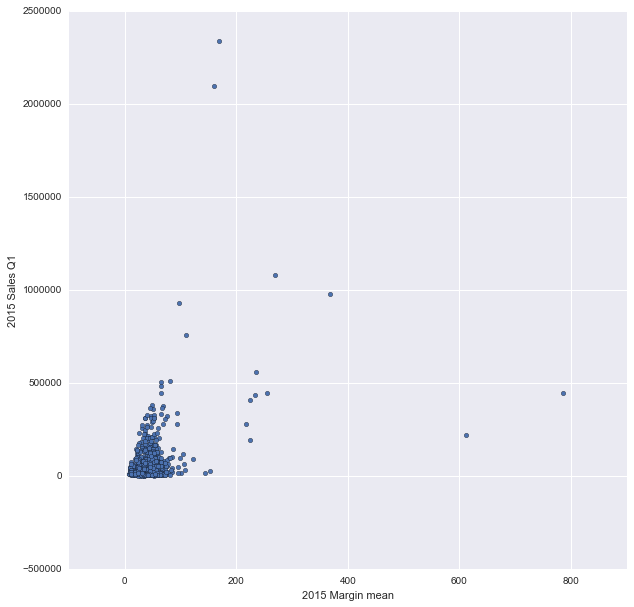

In [21]:
# Perform some exploratory analysis, e.g.
sales.plot.scatter(x="2015 Margin mean", y="2015 Sales Q1")
plt.show()

Model fit: 0.98490569032
4.23952836026 11566.7692834


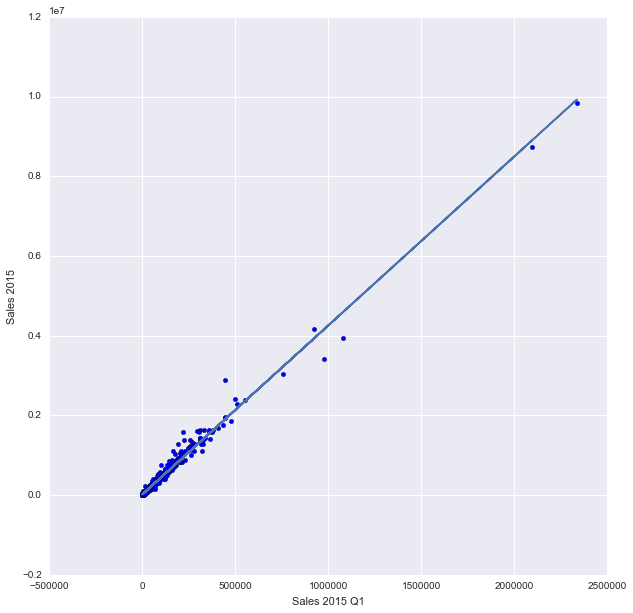

In [22]:
# Fit a model

lm = linear_model.LinearRegression()
X = sales[["2015 Sales Q1"]]
y = sales["2015 Sales"]
lm.fit(X, y)
predictions = lm.predict(X)
print "Model fit:", lm.score(X, y)
print lm.coef_[0], lm.intercept_

# Plot the data and the best fit line
plt.scatter(X, y)
plt.plot(X, predictions)
plt.xlabel("Sales 2015 Q1")
plt.ylabel("Sales 2015")
plt.show()

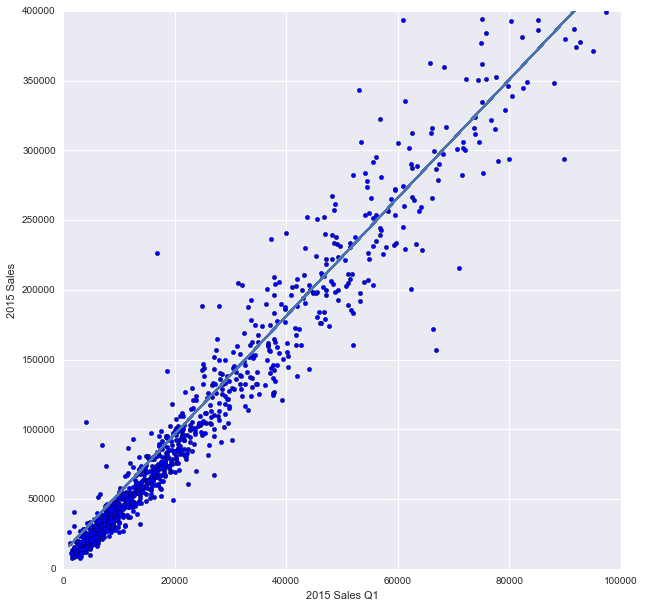

In [23]:
# Zoom in on the lower corner
plt.scatter(X, y)
plt.plot(X, predictions)
plt.xlabel("2015 Sales Q1")
plt.ylabel("2015 Sales")
plt.xlim(0, 100000)
plt.ylim(0, 400000)
plt.show()

In [25]:
# Predict Total 2016 sales, compare to 2015

X = sales[["2016 Sales Q1"]]
predictions = lm.predict(X)
total_2016 = sum(predictions)
total_2015 = sum(sales["2015 Sales"])
X2 = sales[["2015 Sales Q1"]]
pred_2015 = sum(lm.predict(X2))

print "2015 predicted", pred_2015
print "2015 actual", total_2015
print "2016 predicted", total_2016


2015 predicted 270725844.17
2015 actual 270725844.17
2016 predicted 274353169.5


In [14]:
# Try per zip code to get better resolution
zip_codes = set(sales["Zip Code"].tolist())
models = dict()
all_predictions = []
coefficients = [[],[]]
for zip_code in sorted(zip_codes):
    # Pull out stores in this zip
    zip_sales = sales[sales["Zip Code"] == zip_code]
    lm = linear_model.LinearRegression()
    # Fit a model
    X = zip_sales[["2015 Sales Q1"]]
    y = zip_sales["2015 Sales"]
    lm.fit(X, y)
    models[zip_code] = lm
    predictions2015 = lm.predict(X)
    X2 = zip_sales[["2016 Sales Q1"]]
    predictions2016 = lm.predict(X2)
    all_predictions.append((sum(y), sum(predictions2015), sum(predictions2016)))
    if lm.score(X, y) > 0.8 and lm.score(X, y) < 1:
        coefficients[0].append(lm.coef_[0])
        coefficients[1].append(lm.intercept_)
print "Averaged model coefficients:", np.mean(coefficients[0]), np.mean(coefficients[1])


Averaged model coefficients: 4.53526304694 1479.64732026


In [12]:
# Filter out stores that opened or closed throughout the year
# If this wasn't done already
lower_cutoff = pd.Timestamp("20150301")
upper_cutoff = pd.Timestamp("20151001")
mask = (sales['First Date'] < lower_cutoff) & (sales['Last Date'] > upper_cutoff)
sales2 = sales[mask]

1109
Model fit: 0.987579868264


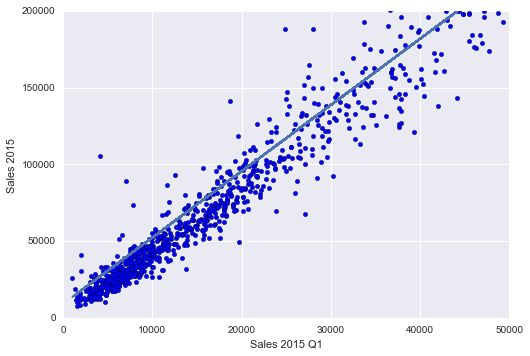

In [10]:
# Fit a model

lm = linear_model.LinearRegression()
X = sales2[["2015 Sales Q1"]]
print len(X)
y = sales2["2015 Sales"]
lm.fit(X, y)
predictions = lm.predict(X)
print "Model fit:", lm.score(X, y)

# Plot the data and the best fit line
plt.scatter(X, y)
plt.plot(X, predictions)
plt.xlabel("Sales 2015 Q1")
plt.ylabel("Sales 2015")
plt.xlim(0, 50000)
plt.ylim(0, 200000)
plt.show()

In [11]:
# Predict Total 2016 sales, compare to 2015

X = sales[["2016 Sales Q1"]]
predictions = lm.predict(X)
total_2016 = sum(predictions)
total_2015 = sum(sales["2015 Sales"])
X2 = sales[["2015 Sales Q1"]]
pred_2015 = sum(lm.predict(X2))

print "2015 predicted", pred_2015
print "2015 actual", total_2015
print "2016 predicted", total_2016


2015 predicted 272617256.576
2015 actual 270725844.17
2016 predicted 276313274.605
